In [1]:
import torch
from stochasticsqp import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import numpy as np
torch.manual_seed(28)
np.random.seed(28)
import sys
# Import all problems fro directory `problems`
import os
import importlib.util
def import_all_classes_from_directory(directory):
    classes = {}
    for filename in os.listdir(directory):
        if filename.endswith('.py'):
            module_name = filename[:-3]  # Remove '.py' to get the module name
            module_path = os.path.join(directory, filename)
            
            # Import the module
            spec = importlib.util.spec_from_file_location(module_name, module_path)
            module = importlib.util.module_from_spec(spec)
            spec.loader.exec_module(module)
            
            # Iterate through attributes of the module
            for attribute_name in dir(module):
                attribute = getattr(module, attribute_name)
                if isinstance(attribute, type):  # Check if it's a class
                    classes[attribute_name] = attribute
    return classes 
directory_path = './problems'
all_problems = import_all_classes_from_directory(directory_path)
# Now all_problems is a dictionary where keys are names of problem classes and values are problem objects
problem_name = "DarcyMatrix" #"Spring" #sys.argv[1]

problem = all_problems[problem_name](device, n_obj_sample = 100, n_constrs = 30, n_test_sample=3)    



In [2]:
path='mdl/nn_DarcyMatrix'
problem.load_net(path)

/var/folders/gb/yq9pv6nd6rg0fq58cfmnthj80000gn/T/ipykernel_23618/3717459009.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


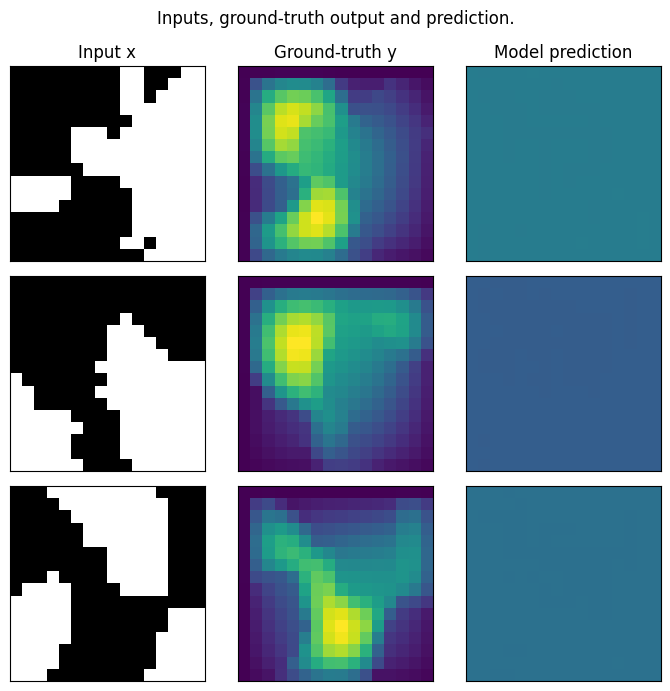

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 7))
for index in range(3):
    # Input x
    x = problem.test_input_data[index]
    # Ground-truth
    y = problem.test_ground_truth[index]
    # Model prediction
    out = problem.net(problem.test_input_data)[index]
    
    vmax=torch.max(y)
    vmin=torch.min(y)

    ax = fig.add_subplot(3, 3, index*3 + 1)
    ax.imshow(x[0], cmap='gray')
    if index == 0:
        ax.set_title('Input x')
    plt.xticks([], [])
    plt.yticks([], [])

    ax = fig.add_subplot(3, 3, index*3 + 2)
    ax.imshow(y.squeeze(),vmin=vmin, vmax=vmax)
    if index == 0:
        ax.set_title('Ground-truth y')
    plt.xticks([], [])
    plt.yticks([], [])
    

    ax = fig.add_subplot(3, 3, index*3 + 3)
    ax.imshow(out.squeeze().detach().numpy(),vmin=vmin, vmax=vmax)
    if index == 0:
        ax.set_title('Model prediction')
    plt.xticks([], [])
    plt.yticks([], [])
    

fig.suptitle('Inputs, ground-truth output and prediction.', y=0.98)
plt.tight_layout()
fig.show()